### Cost Function
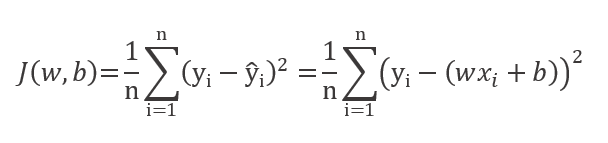

### Regression:
#### Overfitting:
Low Bias<br>
High variance<br>
Training data- high accuracy <br>
Test data-low accuracy  <br>

#### Best Fit:
Low Bias<br>
Low Variance<br> 
Training data-high <br>
Test data-  high<br>

#### Underfitting: 
High Bias<br>
High Variance<br>
Training data- low<br>
Test data- low <br>

### Classification:
#### Overfitting:
Low Bias<br>
High variance<br>
Training error- 1%  <br>
Test error-20%   <br>

#### Best Fit:
Low Bias<br>
Low Variance<br> 
Training error-10% <br>
Test error- 10%<br>

#### Underfitting: 
High Bias<br>
High Variance<br>
Training error- 25%<br>
Test error- 26% <br>

### Ridge and Lasso Regression Implementation


In [51]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
df=load_boston()
dataset=pd.DataFrame(df.data)
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [53]:
dataset.columns=df.feature_names
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [54]:
# df
dataset['Price']=df.target
# dataset
X=dataset.iloc[:,:-1] #independent feature
y=dataset.iloc[:,-1] #dependent feature

## Linear Regression

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_regressor=LinearRegression()
mse=cross_val_score(lin_regressor,X,y,scoring='neg_mean_squared_error',cv=5) #cv is cross validation
mean_mse=np.mean(mse)
mean_mse


-37.13180746769922

## Ridge Regression

In [56]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100,120,130,135,140,145,150,155,160,170,200]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100, 120, 130,
                                   135, 140, 145, 150, 155, 160, 170, 200]},
             scoring='neg_mean_squared_error')

In [57]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 150}
-29.753617234142734


## Lasso Regression

In [58]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,0.1,0.2,0.25,0.3,0.5,0.6,0.9,1,5,10,20,30,35,40,45,50,55,100,120,130,135,140,145,150,155,160,170,200]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X,y)

D:\Anaconda\envs\ml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4430.746729651311, tolerance: 3.9191485420792076
  model = cd_fast.enet_coordinate_descent(
D:\Anaconda\envs\ml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4397.459304778431, tolerance: 3.3071316790123455
  model = cd_fast.enet_coordinate_descent(
D:\Anaconda\envs\ml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3796.653037433508, tolerance: 2.813643886419753
  model = cd_fast.enet_coordinate_descent(
D:\Anaconda\envs\ml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did n

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 0.1, 0.2,
                                   0.25, 0.3, 0.5, 0.6, 0.9, 1, 5, 10, 20, 30,
                                   35, 40, 45, 50, 55, 100, 120, 130, 135, 140,
                                   145, 150, 155, ...]},
             scoring='neg_mean_squared_error')

In [59]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.3}
-34.45504243875092


In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
prediction_lasso=lasso_regressor.predict(X_test)
prediction_ridge=ridge_regressor.predict(X_test)

D:\Anaconda\envs\ml\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

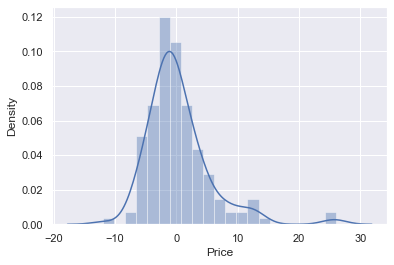

In [61]:
import seaborn as sns
sns.distplot(y_test-prediction_lasso)

D:\Anaconda\envs\ml\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

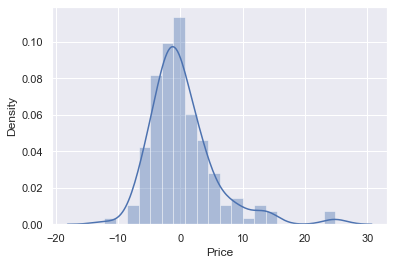

In [62]:
sns.distplot(y_test-prediction_ridge)

### MultiCollinearity

In [63]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [64]:
df_adv= pd.read_csv('Advertising.csv') # Reading the data file
# df_adv
X=df_adv[['TV',"radio",'newspaper']]
y=df_adv['sales']
df_adv

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [65]:
## Fit a OLS model with intercept on TV and Radio
X= sm.add_constant(X)
model=sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 25 Mar 2022   Prob (F-statistic):           1.58e-96
Time:                        09:21:52   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
X.iloc[:,1:].corr()

,TV,radio,newspaper
TV,1.000000,0.054809,0.056648
radio,0.054809,1.000000,0.354104
newspaper,0.056648,0.354104,1.000000


### R-square
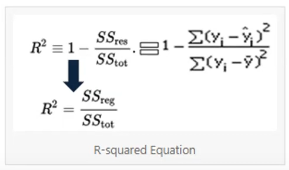 <br>
We will be getting R-square negative only when, our best fit line is worse than average line.
- It is used for to check goodness of best-fit line

### Adjusted- R-square
- When no of features increases, Rsquare usually increases
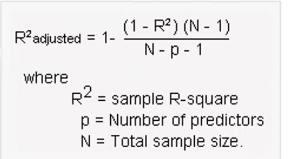
- It penalises attributes that are not correlated

#### One categorical feature (ex, Gender) <br>
Null: There is no difference in proportion <br>
Alternate: There is a difference in proportion <br>
Test: One Sample Proportion test <br>
if P <=0.05 reject Null and accept Alternate <br>
#### Two categorical feature (ex, Based on age group is there difference in proportion for gender) <br>
Null: There is no difference in proportion <br>
Alternate: There is a difference in proportion <br>
Test: Chi Square test <br>
if P <=0.05 reject Null and accept Alternate <br>
#### One continuous variable (ex, weights) <br>
Null: There is no difference in proportion <br>
Alternate: There is a difference in proportion <br>
Test: T test <br>
if P <=0.05 reject Null and accept Alternate <br>
#### One continuous variable (ex, weights,heights) <br>
Null: There is no relationalship <br>
Alternate: There is a relationalship <br>
Test: check Correlation, T test <br>
if P <=0.05 reject Null and accept Alternate <br>
#### One continuous variable and one categorical<br>
Test:  T test <br>
#### One continuous variable and one or 2 with more categories<br>
Test:  Anova test <br>

### T Test:<br>
A T-test is a type of inferential statistic which is used to determine if there is a significant difference between the means of 2 groups which may be related in certain features.<br>
t-test has 2 types:<br>
1. One sampled t-test <br>
2. Two sampled t-test <br>

#### One Sample t-test:<br>
The test will tell us whether means of sample and population are different<br>
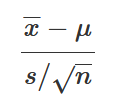<br>


In [86]:
ages=[10,20,30,35,45,50,57,62,69,71,76,82,88,91,42,24,17,11,70,31,10,44,50,55,76,75]
ages_mean=np.mean(ages)
sample_size=10
age_sample=np.random.choice(ages,sample_size)
age_sample

array([55, 24, 71, 45, 50, 71, 88, 35, 69, 44])

In [87]:
from scipy.stats import ttest_1samp
ttest, p_value=ttest_1samp(age_sample,ages_mean)
p_value

0.39062294521378726

In [88]:
if p_value<0.05: #alpha value is 0.05 or 5%
    print('we are rejecting null hypothesis')
else:
    print('we are accepting null hypothesis')

we are accepting null hypothesis


In [89]:
##2nd example
import scipy.stats as stats
np.random.seed(6)
school_ages=stats.poisson.rvs(loc=18,mu=35,size=1500)
school_ages

array([62, 59, 44, ..., 45, 52, 50])

In [90]:
classA_ages=stats.poisson.rvs(loc=18,mu=30,size=60)
classA_ages

array([52, 46, 40, 40, 47, 50, 51, 45, 44, 52, 46, 53, 43, 44, 51, 50, 54,
       42, 54, 45, 61, 53, 49, 46, 47, 41, 45, 51, 43, 45, 48, 50, 40, 52,
       44, 55, 54, 40, 45, 46, 54, 42, 46, 35, 51, 51, 46, 48, 47, 35, 52,
       52, 39, 44, 48, 40, 42, 46, 47, 45])

In [91]:
ttest, p_value=ttest_1samp(classA_ages,school_ages.mean())
p_value

1.139027071016194e-13

In [92]:
if p_value<0.05: #alpha value is 0.05 or 5%
    print('we are rejecting null hypothesis')
else:
    print('we are accepting null hypothesis')

we are rejecting null hypothesis


### Two-Sample t test <br>
The independent samples t Test or 2-sample t-test compares the means of 2 independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. The independent samples t-test is a parametric test. This test is also known as: Inpendent t-test <br>
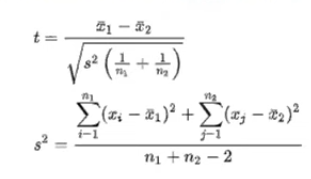

In [93]:
classB_ages=stats.poisson.rvs(loc=18,mu=33,size=60)
classB_ages.mean()

50.68333333333333

In [95]:
ttest, p_value=stats.ttest_ind(classA_ages,classB_ages,equal_var=False)
p_value

0.00030935839774215933

In [96]:
if p_value<0.05: #alpha value is 0.05 or 5%
    print('we are rejecting null hypothesis')
else:
    print('we are accepting null hypothesis')

we are rejecting null hypothesis


### Paired T-test with Python
When you want to check how different samples from same group are, you can go for a paired T-test

In [101]:
weight1=[20,25,22,30,31,23,28,25,29,35,40,41,19,45,33,39,37,35,22,27]
weight2=weight1+stats.norm.rvs(scale=5,loc=-1.25,size=len(weight1))
print(weight1)
print(weight2)

[20, 25, 22, 30, 31, 23, 28, 25, 29, 35, 40, 41, 19, 45, 33, 39, 37, 35, 22, 27]
[20.70682165 18.68279207 22.81148759 29.59150141 29.65008031 22.06972095
 33.80728033 24.79404463 16.31208566 31.92468091 43.62346985 28.97656105
 23.49454333 47.6563914  31.7087419  35.7977801  39.37949667 36.77794593
 19.75724064 29.06879974]


In [103]:
weight_df=pd.DataFrame({'weight_10':np.array(weight1),'weight_20':np.array(weight2),'weight_change':np.array(weight2)-np.array(weight1)})
weight_df

,weight_10,weight_20,weight_change
0,20,20.706822,0.706822
1,25,18.682792,-6.317208
2,22,22.811488,0.811488
3,30,29.591501,-0.408499
4,31,29.650080,-1.349920
5,23,22.069721,-0.930279
6,28,33.807280,5.807280
7,25,24.794045,-0.205955
8,29,16.312086,-12.687914
9,35,31.924681,-3.075319


In [104]:
ttest, p_value=stats.ttest_rel(weight1,weight2)
p_value

0.38070248919414196

In [105]:
if p_value<0.05: #alpha value is 0.05 or 5%
    print('we are rejecting null hypothesis')
else:
    print('we are accepting null hypothesis')

we are accepting null hypothesis


### Correlation

In [106]:
df=sns.load_dataset('iris')
df.shape

(150, 5)

In [107]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


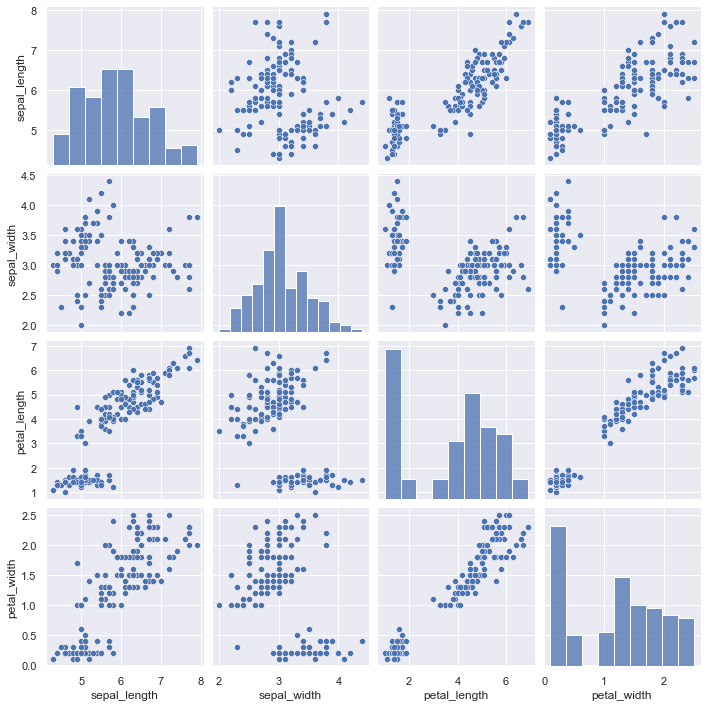

In [108]:
sns.pairplot(df)

#### Chi-Square Test

The test is applied when you have 2 categorical variables from a single population. It is used to determine whether there is a significant association between the 2 variables

In [109]:
dataset=sns.load_dataset('tips')
dataset

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [110]:
dataset_table=pd.crosstab(dataset['sex'],dataset['smoker'])
dataset_table

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [112]:
observed_values=dataset_table.values
observed_values

array([[60, 97],
       [33, 54]], dtype=int64)

In [113]:
val=stats.chi2_contingency(dataset_table)
val

(0.008763290531773594,
 0.925417020494423,
 1,
 array([[59.84016393, 97.15983607],
        [33.15983607, 53.84016393]]))

In [114]:
expected_val=val[3]
expected_val

array([[59.84016393, 97.15983607],
       [33.15983607, 53.84016393]])

In [116]:
nrow=len(dataset_table.iloc[0:2,0])
ncol=len(dataset_table.iloc[0,0:2])
ddof=(nrow-1)*(ncol-1)
alpha=0.05#variance we can capture
ddof

1

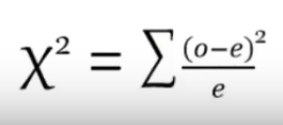

In [117]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(observed_values,expected_val)])
chi_square_statistic=chi_square[0]+chi_square[1]
chi_square_statistic

0.001934818536627623

In [118]:
critical_val=chi2.ppf(q=1-alpha,df=ddof)
critical_val

3.841458820694124

In [120]:
p_val=1-chi2.cdf(x=chi_square_statistic,df=ddof)
p_val

0.964915107315732

In [121]:
if chi_square_statistic>=critical_val:
    print("Reject Ho,there is a relationship between 2 categorical variables")
else:
    print("Accept Ho,there is no relationship between 2 categorical variables")
    
if p_val<=alpha:
    print("Reject Ho,there is a relationship between 2 categorical variables")
else:
    print("Accept Ho,there is no relationship between 2 categorical variables")

Accept Ho,there is no relationship between 2 categorical variables
Accept Ho,there is no relationship between 2 categorical variables
